# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vax_data = 
read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
vax_data |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
# create the df_vacc_rates here

df_vacc_rates = 
    vax_data |>
    filter(mmr>=0)|> 
    group_by(state) |>
    summarise(total_schools = n(),
        fraction_schools_over_95 = sum(mmr >= 95, na.rm = TRUE) / total_schools) 

df_vacc_rates

state,total_schools,fraction_schools_over_95
<chr>,<int>,<dbl>
Arizona,1171,0.506404782
Arkansas,567,0.003527337
California,14225,0.888506151
Colorado,1507,0.623092236
Connecticut,589,0.811544992
Illinois,7686,0.896825397
Maine,357,0.473389356
Massachusetts,954,0.865828092
Minnesota,1593,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [5]:
df_vacc_rates = vax_data |>
  filter(mmr >= 0) |>
  group_by(state) |>
  mutate(total_schools = n()) |>
  mutate(fraction_schools_over_95 = sum(mmr >= 95) / total_schools)

df_vacc_rates |> 
    arrange(fraction_schools_over_95) |>
    select(state, fraction_schools_over_95) |> head(1)

state,fraction_schools_over_95
<chr>,<dbl>
Arkansas,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

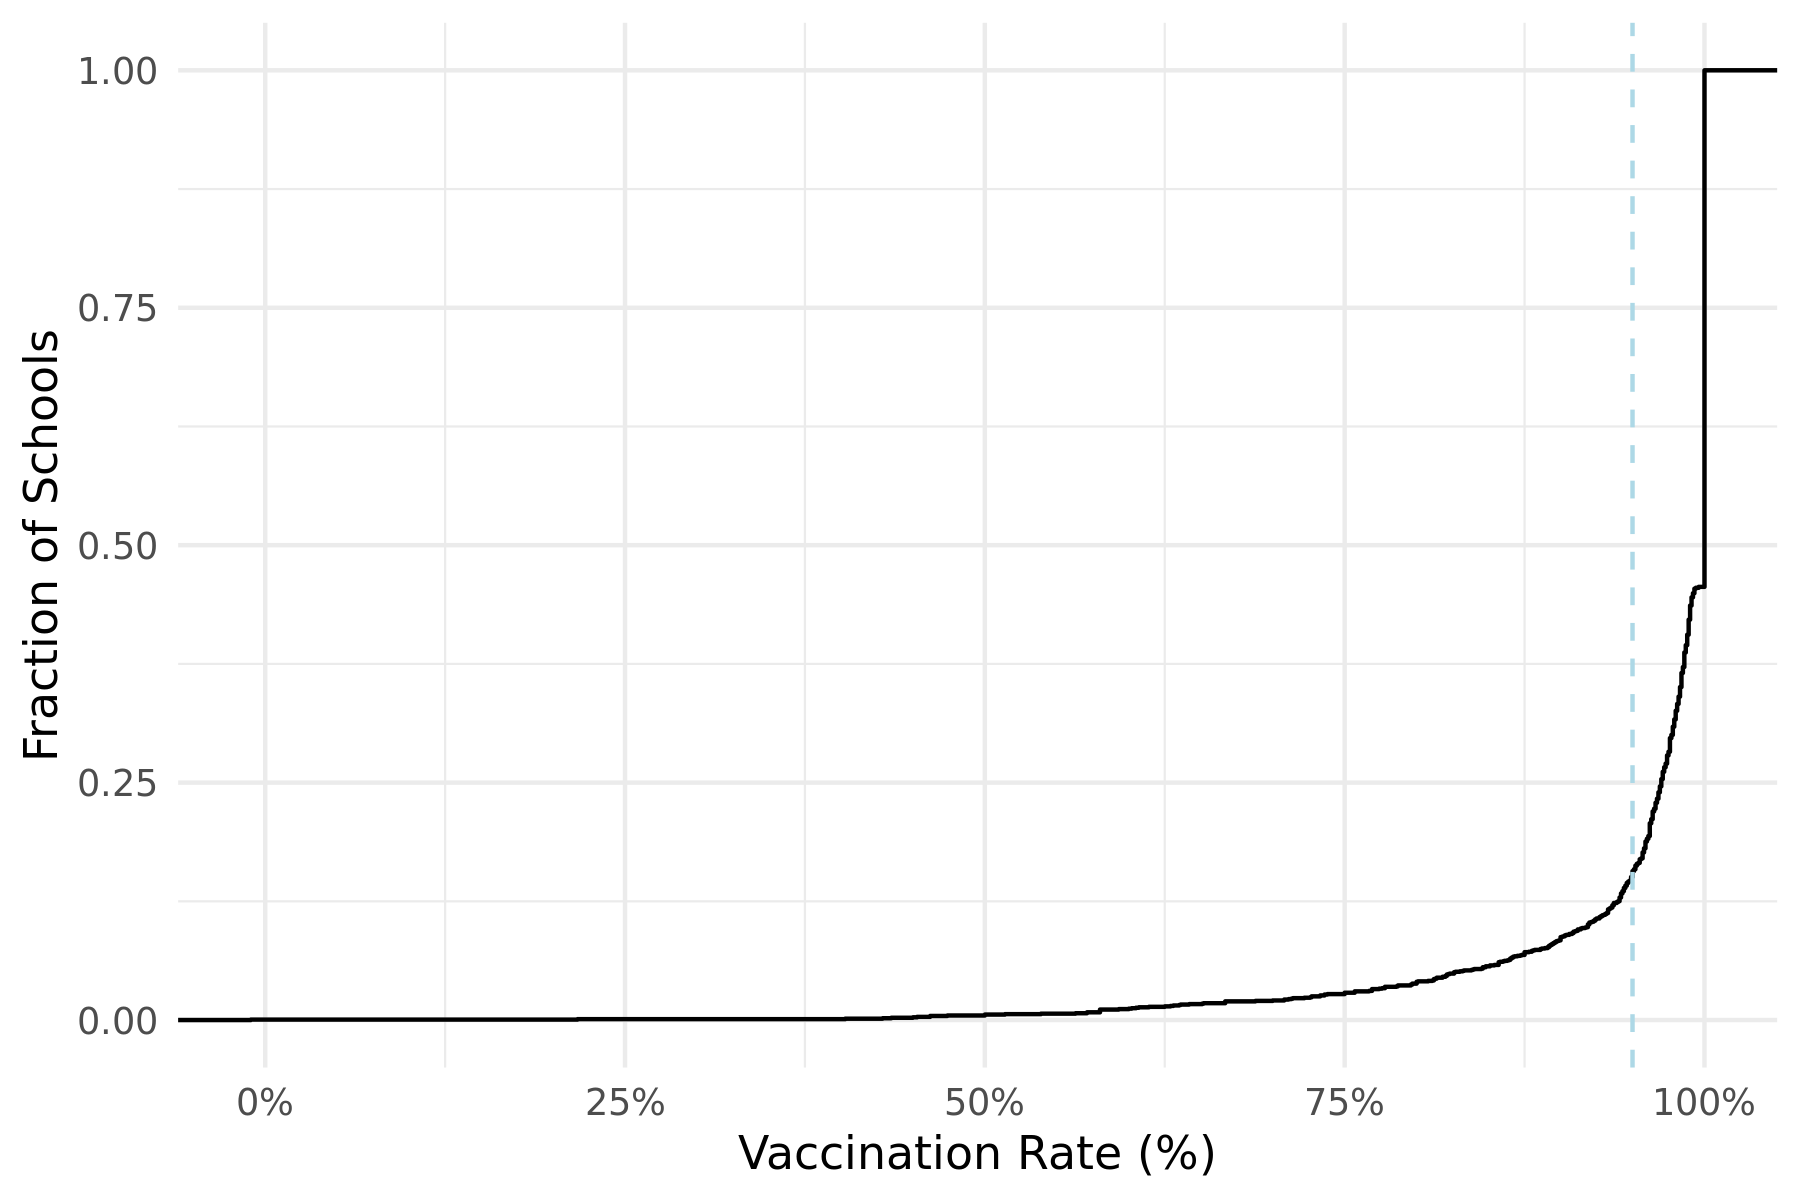

In [20]:
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 6)

ecdf = vax_data |>
    filter(state == "North Carolina")

p = ggplot(ecdf, aes(x = overall)) + stat_ecdf(geom = 'step') +
    geom_vline(xintercept = 95, color = 'light blue', linetype = 'dashed') +
    scale_x_continuous(labels = scales::percent_format(scale = 1)) + theme_minimal() + 
    labs(x = "Vaccination Rate (%)", y = "Fraction of Schools")

p

Is the median vaccination rate for NC schools above the CDC recommended target?

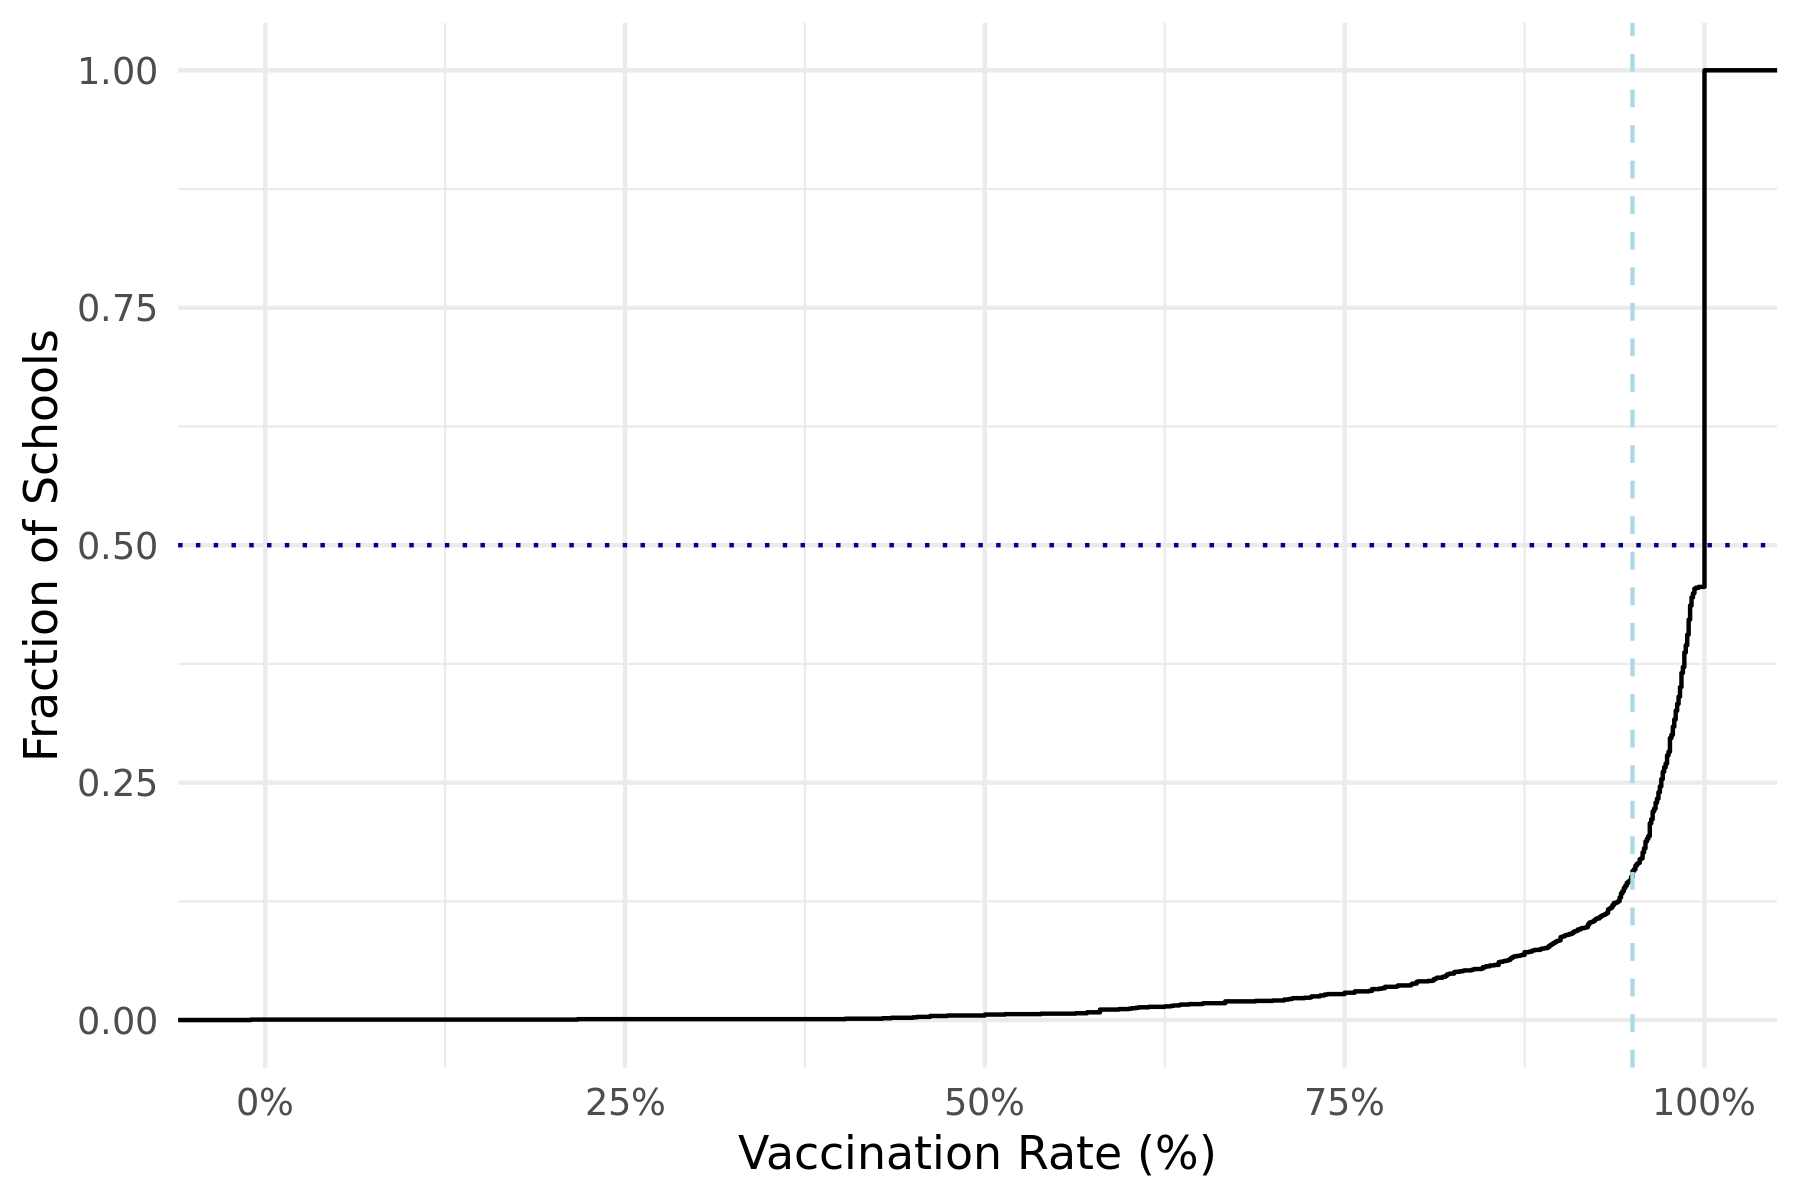

In [23]:
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 6)

p = ggplot(ecdf, aes(x = overall)) + stat_ecdf(geom = 'step') +
    geom_vline(xintercept = 95, color = 'light blue', linetype = 'dashed') +
    scale_x_continuous(labels = scales::percent_format(scale = 1)) + theme_minimal() + 
    labs(x = "Vaccination Rate (%)", y = "Fraction of Schools") +
    geom_hline(yintercept = 0.50, color = "dark blue", linetype = 'dotted')

p

Yes, the median vaccination rate in NC schools is past 95%, the CDC recommended target. This is evident in that the 0.5 y-intercept, 